In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from scipy.integrate import trapezoid

In [2]:
lol_15_euw_df = pd.read_csv('match_data_v5.csv')
lol_15_na_df = pd.read_csv('LoL_15_Diamond.csv')
#lol_esports_df = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
# Give lol_15_euw_df columns name, dropping the last useless col
lol_15_euw_df.drop(lol_15_euw_df.columns[-1], axis = 1, inplace=True)
lol_15_euw_df.columns = ['MatchId','blueTeamControlWardsPlaced', 'blueTeamWardsPlaced', 'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills',
                 'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed', 'blueTeamTurretPlatesDestroyed', 'blueTeamFirstBlood', 'blueTeamMinionsKilled',
                 'blueTeamJungleMinions', 'blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalDamageToChamps', 'redTeamControlWardsPlaced', 'redTeamWardsPlaced',
                 'redTeamTotalKills', 'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed', 'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed',
                 'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold', 'redTeamXp', 'redTeamTotalDamageToChamps', 'blueWin'] 

display(lol_15_euw_df)
display(lol_15_na_df)
#display(lol_esports_df)

,MatchId,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,0,2,0,1,400,94,29637,32613,27239,1
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,0,1,0,4,373,76,28970,30320,36585,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,0,2,0,3,340,84,30510,29464,42984,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,0,5,378,87,25157,31069,28229,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,0,1,0,5,382,96,26052,29475,19245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,EUW1_6879062849',0,27,1,1,0,0,0,5,0,...,0,0,0,0,370,102,26134,30760,22845,0
24221,EUW1_6878994449',4,29,5,0,0,0,0,4,0,...,0,1,0,2,365,80,25169,30857,29694,0
24222,EUW1_6878933095',1,25,16,1,1,1,0,11,0,...,0,1,0,4,342,81,30528,29566,36545,0
24223,EUW1_6883217488',4,27,15,0,0,1,0,9,0,...,0,2,0,2,341,74,31761,30573,42858,0


,match_id,blue_Win,blue_Wards,blue_Yellow_Wards,blue_Sight_Wards,blue_Blue_Wards,blue_Control_Wards,blue_Wards_Destroyed,blue_First_Blood,blue_Kills,...,red_Avg_Level,red_Total_XP,red_Total_CS,red_Total_Jungle_Monsters,red_Gold_Diff,red_XP_Diff,red_Magic_Dmg,red_Physical_Dmg,red_True_Dmg,red_Total_Dmg
0,NA1_4959489871,1.0,22.0,10.0,9.0,0.0,2.0,8.0,1.0,14.0,...,9.2,28335.0,300.0,76.0,-2925.0,-620.0,10969.0,16477.0,678.0,28127.0
1,NA1_4959433709,0.0,63.0,16.0,3.0,0.0,2.0,3.0,0.0,15.0,...,9.2,28344.0,317.0,80.0,1397.0,-244.0,8733.0,23898.0,1292.0,33926.0
2,NA1_4959406776,1.0,26.0,19.0,2.0,2.0,3.0,0.0,1.0,14.0,...,9.0,27118.0,337.0,84.0,-58.0,-2804.0,16146.0,11446.0,1893.0,29490.0
3,NA1_4959124290,1.0,140.0,18.0,5.0,0.0,3.0,6.0,0.0,17.0,...,9.0,28779.0,357.0,70.0,-3082.0,-3642.0,12668.0,19022.0,3303.0,34994.0
4,NA1_4959103781,1.0,144.0,20.0,7.0,0.0,2.0,3.0,0.0,18.0,...,9.0,28009.0,339.0,86.0,-5003.0,-2592.0,8574.0,20283.0,296.0,29155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,NA1_4959189957,1.0,22.0,15.0,7.0,0.0,0.0,7.0,1.0,19.0,...,9.0,28503.0,358.0,88.0,-6661.0,-1715.0,14347.0,9614.0,1083.0,25049.0
21511,NA1_4960037601,0.0,32.0,18.0,7.0,0.0,5.0,7.0,0.0,15.0,...,9.0,28026.0,321.0,60.0,5581.0,2298.0,15482.0,29784.0,1150.0,46418.0
21512,NA1_4958099242,1.0,25.0,21.0,4.0,0.0,0.0,5.0,0.0,11.0,...,9.0,28463.0,314.0,100.0,616.0,-147.0,13627.0,15116.0,986.0,29733.0
21513,NA1_4956218916,1.0,28.0,16.0,9.0,0.0,3.0,7.0,0.0,11.0,...,9.0,29272.0,357.0,78.0,-79.0,-2260.0,7095.0,20610.0,1751.0,29459.0


In [3]:
# Adding features
lol_15_euw_df['totalGoldDiff'] = lol_15_euw_df['blueTeamTotalGold'] - lol_15_euw_df['redTeamTotalGold']
lol_15_euw_df['totalXpDiff'] = lol_15_euw_df['blueTeamXp'] - lol_15_euw_df['redTeamXp']
lol_15_euw_df['totalKillsDiff'] = lol_15_euw_df['blueTeamTotalKills'] - lol_15_euw_df['redTeamTotalKills']
lol_15_euw_df['totalDamageDiff'] = lol_15_euw_df['blueTeamTotalDamageToChamps'] - lol_15_euw_df['redTeamTotalDamageToChamps']

In [4]:
# The turret plates cannot be > 15 in real game
lol_15_euw_df = lol_15_euw_df[lol_15_euw_df['blueTeamTurretPlatesDestroyed'] <= 15]
lol_15_euw_df = lol_15_euw_df[lol_15_euw_df['redTeamTurretPlatesDestroyed'] <= 15]
lol_15_euw_df.shape

(23685, 33)

In [5]:
#Cancel some data in na_df to concatenate into 1 df
reduced_na_df = pd.DataFrame()
reduced_na_df['MatchId'] = lol_15_na_df['match_id']
reduced_na_df['blueTeamControlWardsPlaced'] = lol_15_na_df['blue_Control_Wards']
reduced_na_df['blueTeamWardsPlaced'] = lol_15_na_df['blue_Wards']
reduced_na_df['blueTeamTotalKills'] = lol_15_na_df['blue_Kills']
reduced_na_df['blueTeamDragonKills'] = lol_15_na_df['blue_Dragons']
reduced_na_df['blueTeamHeraldKills'] = lol_15_na_df['blue_Heralds']
reduced_na_df['blueTeamTowersDestroyed'] = lol_15_na_df['blue_Towers_Destroyed']
reduced_na_df['blueTeamInhibitorsDestroyed'] = lol_15_na_df['blue_Inhibitors']
reduced_na_df['blueTeamTurretPlatesDestroyed'] = lol_15_na_df['blue_Turret_Plates']
reduced_na_df['blueTeamFirstBlood'] = lol_15_na_df['blue_First_Blood']
reduced_na_df['blueTeamMinionsKilled'] = lol_15_na_df['blue_Total_CS']
reduced_na_df['blueTeamJungleMinions'] = lol_15_na_df['blue_Total_Jungle_Monsters']
reduced_na_df['blueTeamTotalGold'] = lol_15_na_df['blue_Total_Gold']
reduced_na_df['blueTeamXp'] = lol_15_na_df['blue_Total_XP']
reduced_na_df['blueTeamTotalDamageToChamps'] = lol_15_na_df['blue_Total_Dmg']

reduced_na_df['redTeamControlWardsPlaced'] = lol_15_na_df['red_Control_Wards']
reduced_na_df['redTeamWardsPlaced'] = lol_15_na_df['red_Wards']
reduced_na_df['redTeamTotalKills'] = lol_15_na_df['red_Kills']
reduced_na_df['redTeamDragonKills'] = lol_15_na_df['red_Dragons']
reduced_na_df['redTeamHeraldKills'] = lol_15_na_df['red_Heralds']
reduced_na_df['redTeamTowersDestroyed'] = lol_15_na_df['red_Towers_Destroyed']
reduced_na_df['redTeamInhibitorsDestroyed'] = lol_15_na_df['red_Inhibitors']
reduced_na_df['redTeamTurretPlatesDestroyed'] = lol_15_na_df['red_Turret_Plates']

reduced_na_df['redTeamMinionsKilled'] = lol_15_na_df['red_Total_CS']
reduced_na_df['redTeamJungleMinions'] = lol_15_na_df['red_Total_Jungle_Monsters']
reduced_na_df['redTeamTotalGold'] = lol_15_na_df['red_Total_Gold']
reduced_na_df['redTeamXp'] = lol_15_na_df['red_Total_XP']
reduced_na_df['redTeamTotalDamageToChamps'] = lol_15_na_df['red_Total_Dmg']

reduced_na_df['totalGoldDiff'] = lol_15_na_df['blue_Gold_Diff']
reduced_na_df['totalXpDiff'] = lol_15_na_df['blue_XP_Diff']
reduced_na_df['totalKillsDiff'] = lol_15_na_df['blue_Kills'] - lol_15_na_df['red_Kills']
reduced_na_df['totalDamageDiff'] = lol_15_na_df['blue_Total_Dmg'] - lol_15_na_df['red_Total_Dmg']

reduced_na_df['blueWin'] = lol_15_na_df['blue_Win']

In [6]:
# Concat 2 df
df = pd.concat([lol_15_euw_df, reduced_na_df], ignore_index=True)
# The turret plates cannot be > 15 in real game
df = df[df['blueTeamTurretPlatesDestroyed'] <= 15]
df = df[df['redTeamTurretPlatesDestroyed'] <= 15]
display(df)
df.info()
df.describe()

,MatchId,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin,totalGoldDiff,totalXpDiff,totalKillsDiff,totalDamageDiff
0,EUW1_6882489515',2.0,23.0,4.0,2.0,0.0,0.0,0.0,7.0,0.0,...,400.0,94.0,29637.0,32613.0,27239.0,1.0,-5714.0,-2815.0,-12.0,-5397.0
1,EUW1_6882416210',2.0,46.0,12.0,1.0,0.0,1.0,0.0,10.0,0.0,...,373.0,76.0,28970.0,30320.0,36585.0,0.0,-1118.0,210.0,-5.0,-768.0
2,EUW1_6881092720',2.0,19.0,13.0,0.0,0.0,0.0,0.0,11.0,0.0,...,340.0,84.0,30510.0,29464.0,42984.0,0.0,-2384.0,37.0,-5.0,-4945.0
3,EUW1_6879405717',3.0,28.0,8.0,0.0,1.0,1.0,0.0,9.0,1.0,...,378.0,87.0,25157.0,31069.0,28229.0,0.0,2176.0,-603.0,-2.0,3109.0
4,EUW1_6879389461',3.0,30.0,11.0,1.0,1.0,1.0,0.0,7.0,0.0,...,382.0,96.0,26052.0,29475.0,19245.0,1.0,1720.0,1591.0,4.0,7431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45195,NA1_4959189957,0.0,22.0,19.0,2.0,0.0,2.0,0.0,6.0,1.0,...,358.0,88.0,25504.0,28503.0,25049.0,1.0,6661.0,1715.0,11.0,13582.0
45196,NA1_4960037601,5.0,32.0,15.0,1.0,0.0,0.0,0.0,2.0,0.0,...,321.0,60.0,32247.0,28026.0,46418.0,0.0,-5581.0,-2298.0,-8.0,-5944.0
45197,NA1_4958099242,0.0,25.0,11.0,1.0,0.0,1.0,0.0,3.0,0.0,...,314.0,100.0,26726.0,28463.0,29733.0,1.0,-616.0,147.0,-2.0,3392.0
45198,NA1_4956218916,3.0,28.0,11.0,0.0,0.0,0.0,0.0,4.0,0.0,...,357.0,78.0,27764.0,29272.0,29459.0,1.0,79.0,2260.0,-1.0,4478.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MatchId                        45200 non-null  object 
 1   blueTeamControlWardsPlaced     45200 non-null  float64
 2   blueTeamWardsPlaced            45200 non-null  float64
 3   blueTeamTotalKills             45200 non-null  float64
 4   blueTeamDragonKills            45200 non-null  float64
 5   blueTeamHeraldKills            45200 non-null  float64
 6   blueTeamTowersDestroyed        45200 non-null  float64
 7   blueTeamInhibitorsDestroyed    45200 non-null  float64
 8   blueTeamTurretPlatesDestroyed  45200 non-null  float64
 9   blueTeamFirstBlood             45200 non-null  float64
 10  blueTeamMinionsKilled          45200 non-null  float64
 11  blueTeamJungleMinions          45200 non-null  float64
 12  blueTeamTotalGold              45200 non-null 

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin,totalGoldDiff,totalXpDiff,totalKillsDiff,totalDamageDiff
count,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,...,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000
mean,3.522588,42.445487,12.588119,0.743584,0.123230,0.713009,0.001704,6.348119,0.504469,347.780465,...,348.428739,88.319447,27530.077080,29496.532633,31661.761305,0.501460,121.235310,-1.302301,0.102633,122.034889
std,1.999773,44.482617,4.877941,0.723662,0.328772,0.917094,0.049078,3.702328,0.499986,31.442614,...,31.701223,14.156990,2630.784795,1873.848181,6020.025412,0.500003,4263.541373,3020.962720,6.973793,7469.952733
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,...,167.000000,0.000000,16555.000000,17602.000000,8933.000000,0.000000,-20320.000000,-14189.000000,-31.000000,-31002.000000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,327.000000,...,328.000000,79.000000,25691.000000,28276.000000,27519.000000,0.000000,-2707.000000,-2014.000000,-5.000000,-4910.000000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000,349.000000,...,349.000000,88.000000,27384.000000,29510.000000,31435.500000,1.000000,100.000000,-18.000000,0.000000,26.500000
75%,5.000000,36.000000,16.000000,1.000000,0.000000,1.000000,0.000000,9.000000,1.000000,370.000000,...,370.000000,98.000000,29206.000000,30737.000000,35556.250000,1.000000,2927.000000,1995.000000,5.000000,5114.500000
max,20.000000,603.000000,40.000000,2.000000,2.000000,10.000000,2.000000,15.000000,1.000000,465.000000,...,468.000000,174.000000,41076.000000,37011.000000,62452.000000,1.000000,20282.000000,13480.000000,34.000000,36419.000000


# Presentazione del progetto
## Liu Weijie, 166854
## 2023/24
### Dataset utilizzati:
#### https://www.kaggle.com/datasets/karlorusovan/league-of-legends-soloq-matches-at-10-minutes-2024
#### https://www.kaggle.com/datasets/jakejoeanderson/league-of-legends-diamond-matches-ff15

### ***League of Legends*** è un gioco MOBA 5v5 con l'obiettivo finale di distruggere il nexus (base) avversario.
### Nel gioco esiste una meccanica chiamata *"forfeit"*, ovvero rinunciare o arrendersi al minuto 15, che può essere approvata insieme con altri 3 giocatori

## Ha ancora senso la partita che sto giocando al minuto 15❓ 
### Se si, su quali aspetti devo ancora migliorare per vincere la partita?🤨
### Se no, ha senso continuare a giocare oppure arrendersi?

In [7]:
#%%HTML
#<img src="./Images/Map1.jpg", align="center", margin-top="0">


#### **Uccisioni**: Quando sconfiggi l'avversario, il numero dell'uccisione aumenta; e verrai incentivato con l'oro
#### **Minion**: Soldatini che muovono tra le corsie, se uccidi i minion ti danno oro
#### **Oro**: Per comprare gli oggetti che potenziano il giocatore
#### **Torre**: Per raggiungere al nexus nemico ci sono 3 torri su ogni corsia, si impiega molto tempo per distruggere la torre
#### **Placca**: Scudi che prottegge solo la prima torre, c'è ne sono 5 per ogni torre per tutte 3 corsie, ad distruzione delle placche verrai ricompensato dell'oro.

#### **Primo Sangue**: La squadra che ottiene la prima uccisione del gioco, la squadra verrà ricompesato di un piccolo somma di denaro
#### **Draghi**: Mostri neutri, se uccisi darà alla squadra piccoli potenziamenti, ne sono presenti diversi tipi che danno potenziamenti diversi
#### **Grubs**: Mostri neutri, si generano 3 per volta per 2 volte (6 totali), se sconfitti aiuteranno ai giocatori di distruggere più velocemente le torri

## Analisi della correlazione dei dati
--------
#### A parte le correlazioni ovvie, sono presenti dati che hanno dei legami deboli, per esempio <ins>placche della squadra blu è correlata positivamente alle torri della sqaudra rossa</ins>

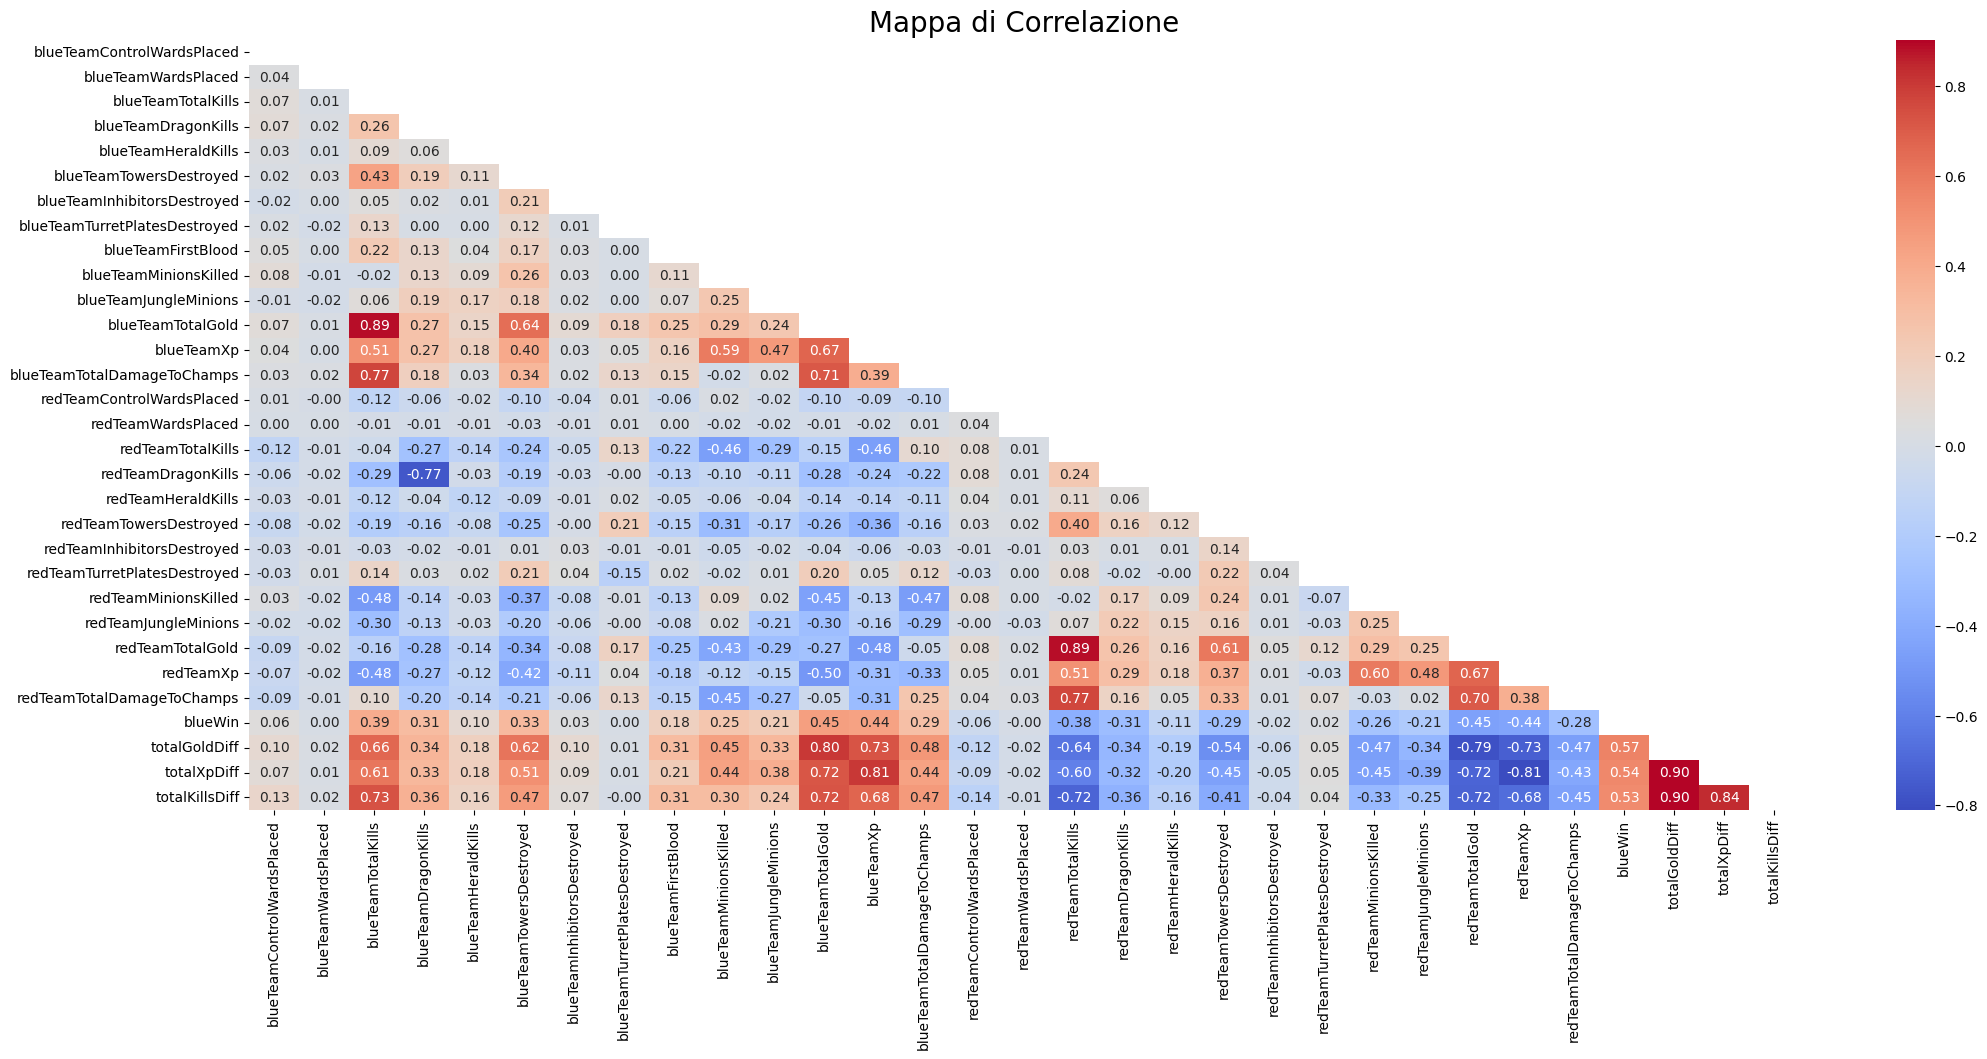

In [8]:
#Get an idea on the which data are correlated
matrix = df.iloc[:, 1:32] # Get all the col and row except the first (matchid)
correlation_matrix = matrix.corr()
#Cut the matrix into upper triangle
half_corr = np.triu(correlation_matrix)
# Visualize
plt.figure(figsize=(25, 10))
# mask to cut into a triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask = half_corr) # Heapmap with sns, with coefficients, coolwarm color, 2 num after dot
plt.title('Mappa di Correlazione',fontsize=20)
plt.show()

## Quanti uccisioni sono necessarie per vincere i primi 15 minuti?
------
#### Nella maggior parte delle partite le squadre hanno una <ins>differenza di uccisioni pari ad 3</ins>

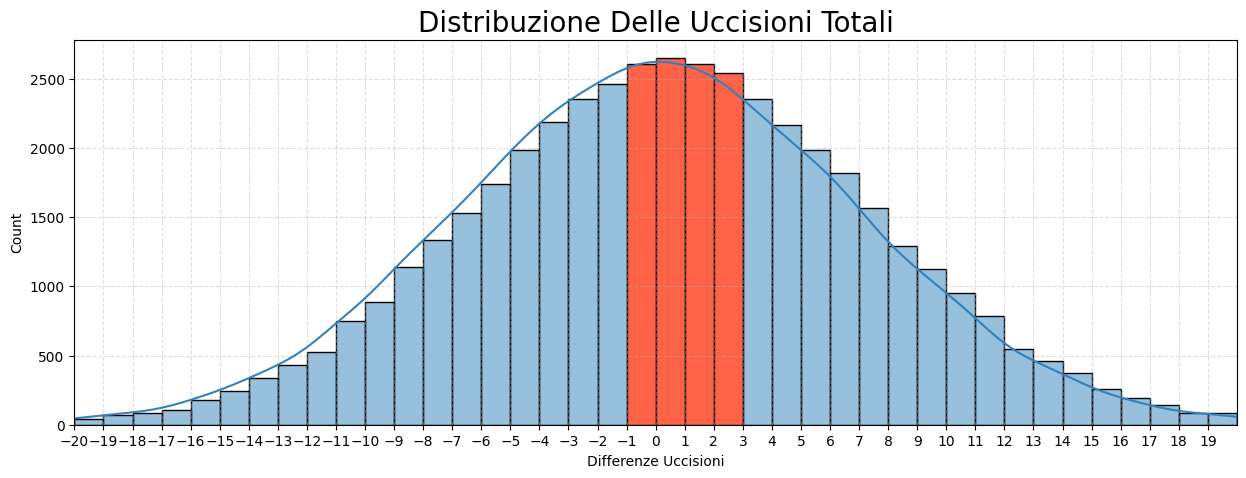

In [10]:

#highBar = ['cornflowerblue' if (x < max(df.totalKillsDiff)) else 'red' for x in df.totalKillsDiff]
plt.figure(figsize=(15, 5))
ax = sns.histplot(df['totalKillsDiff'], kde=True, bins=65, color="#3182bd")
# Set plot limits and titles
plt.xlim(-20, 20)
plt.title('Distribuzione Delle Uccisioni Totali', fontsize=20)
plt.xlabel('Differenze Uccisioni', fontsize=10)

# Find the bars that are over 2500 count
max_height = []
max_patches = []
for patch in ax.patches:
    if patch.get_height() > 2500:
        max_height.append(patch.get_height())
        max_patches.append(patch)
# Highlight the highest bar
for patch in max_patches:
    patch.set_facecolor('tomato')
    patch.set_edgecolor('black')
plt.xticks(np.arange(-20, 20, 1))
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

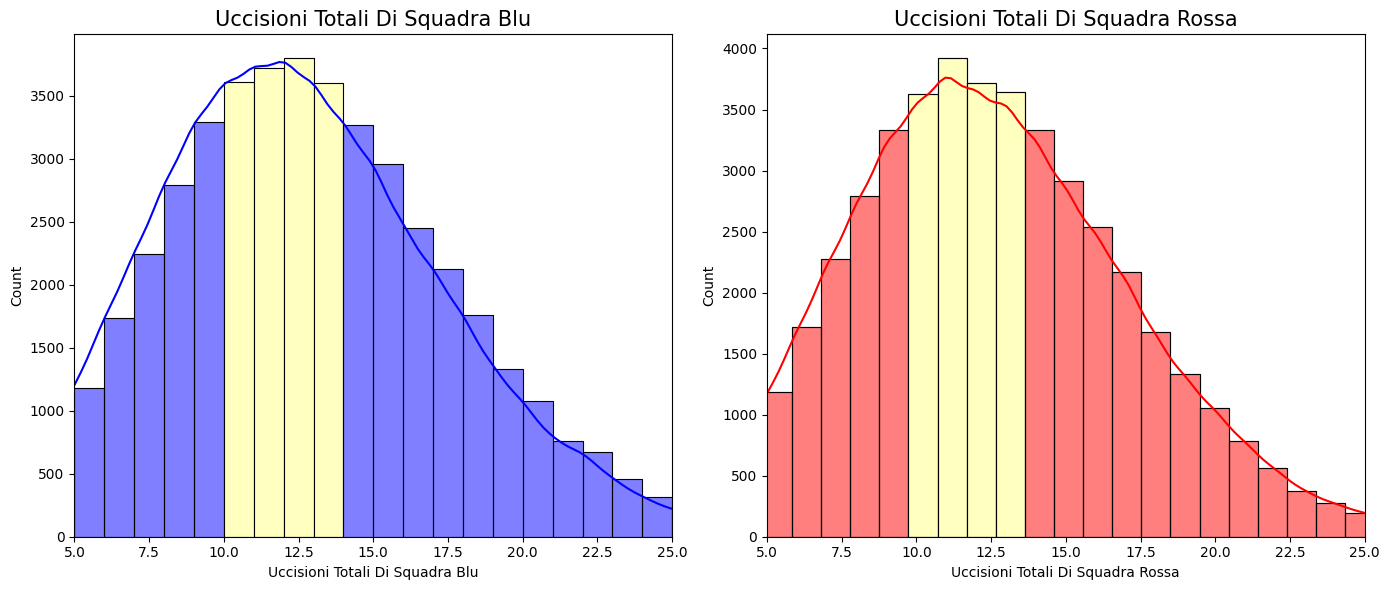

In [11]:
# Trying to create a subplot to unify 2 plots (maybe was better using the arg of col=)
fig, axes = plt.subplots(1,2, figsize=(14, 6))
# Blue Team Plot
sns.histplot(df['blueTeamTotalKills'], color='blue', label='Blue Team', kde=True, bins=40, ax=axes[0]) 
axes[0].set_xlim(5,25)
axes[0].set_title('Uccisioni Totali Di Squadra Blu', fontsize=15)
axes[0].set_xlabel("Uccisioni Totali Di Squadra Blu",fontsize=10)
# Red Team Plot
sns.histplot(df['redTeamTotalKills'], color='red', label='Red Team', kde=True, bins=38, ax=axes[1])
axes[1].set_xlim(5,25)
axes[1].set_title('Uccisioni Totali Di Squadra Rossa', fontsize=15)
axes[1].set_xlabel("Uccisioni Totali Di Squadra Rossa",fontsize=10)

# Get most matches
for i in range(2):
    max_height = []
    max_patches = []
    for patch in axes[i].patches:
        if patch.get_height() > 3500:
            max_height.append(patch.get_height())
            max_patches.append(patch)
    # Highlight the highest bar
    for patch in max_patches:
        patch.set_facecolor('#ffffbf')
        patch.set_edgecolor('black')
plt.tight_layout()
plt.show()

#### più di 35% delle partite terminano con le squadre aventi tra <ins>10 / 13 uccisioni </ins>

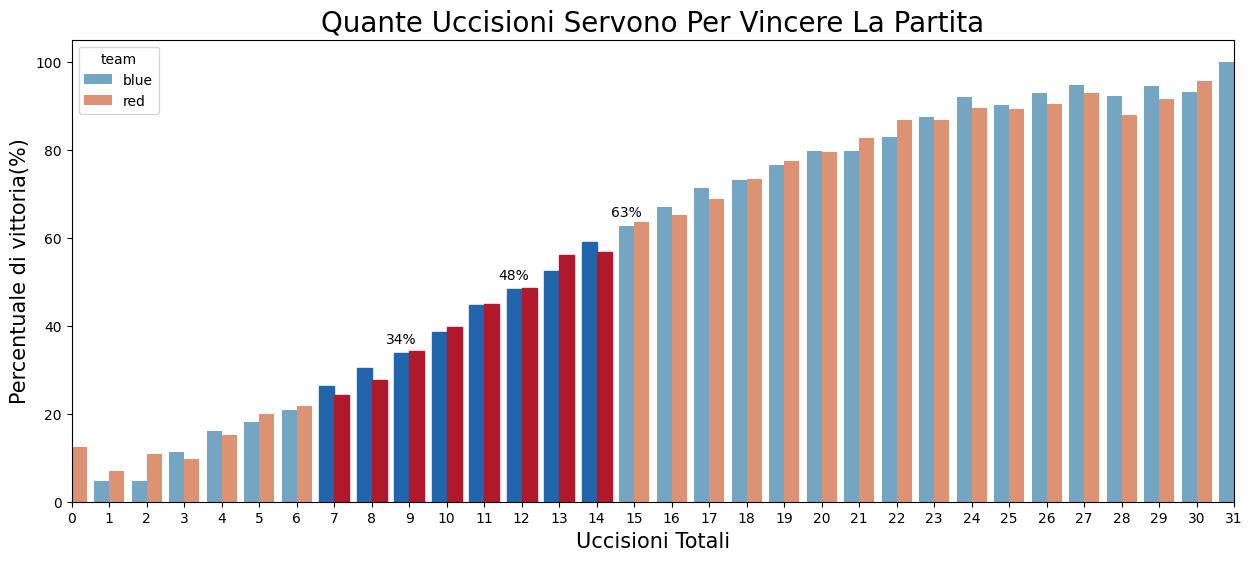

In [12]:
# Group by BlueTeamKills when blue won, and get the mean values
bkills_win_rates = df.groupby('blueTeamTotalKills')['blueWin'].mean().reset_index()
bkills_win_rates['Win_Rate'] = bkills_win_rates['blueWin'] * 100
#display(bkills_win_rates)
# Adding a col. of redWin which is the opposite of blueWin
df['redWin'] = 1 - df['blueWin']
rkills_win_rates = df.groupby('redTeamTotalKills')['redWin'].mean().reset_index()
#display(rkills_win_rates)
rkills_win_rates['Win_Rate'] = rkills_win_rates['redWin'] * 100
# Rename the col. to concat the df more easily
rkills_win_rates = rkills_win_rates.rename(columns={'redTeamTotalKills':'blueTeamTotalKills'})

kills_win_rates = pd.concat((bkills_win_rates,rkills_win_rates))
# Adding a col. called team to divide the red and blue team, and using it as hue
kills_win_rates['team'] = 'blue'
kills_win_rates.loc[39:, 'team'] = 'red'
kills_win_rates['TotalKills'] = kills_win_rates['blueTeamTotalKills'].astype(int)
#display(kills_win_rates)

plt.figure(figsize=(15,6))
darker_palette = {"blue": '#2166ac', "red": "#b2182b"}
ax = sns.barplot(x="TotalKills", y="Win_Rate", data = kills_win_rates,hue="team",palette={"blue":'#67a9cf', "red":"#ef8a62"})
# enumerate to keep the index for each bar (i)
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    if 6.5 <= x <= 14.5:
        team = kills_win_rates.iloc[i]['team']
        bar.set_color(darker_palette[team])
count = 0
for p in ax.patches:
    if count == 9 or count == 12 or count == 15:
        height = p.get_height()
        ax.text(
            x = p.get_x() + p.get_width() / 2., 
            y = height + 1.5, 
            s = '{:1.0f}'.format(height) + "%", 
            # Horizontal alignment
            ha="center", 
            # Vertical alignment
            va="bottom"
        )
    count+=1
# Adding semicol. to suppress the output of labels
plt.xlim(0,31);
plt.title("Quante Uccisioni Servono Per Vincere La Partita", fontsize=20);
plt.xlabel('Uccisioni Totali', fontsize=15);
plt.ylabel('Percentuale di vittoria(%)', fontsize=15);

#### Concentrando nell'intervallo 7 a 14 uccisioni totali, a parità di uccisioni la <ins>squadra blu vince più della rossa</ins>
#### Solo quando la squadra rossa ottiene 13 uccisioni ha una probabilità di vittoria più alta rispetto al blu

### Il mistero che la squadra blu vincono più dei rossi
-----
#### Negli anni passati, tanti giocatori segnalano che la squadra blu vince più della rossa 
#### I dati ufficiali del gioco nel <ins>2017 segnala che la squadra blu vince 52.6% delle partite</ins>

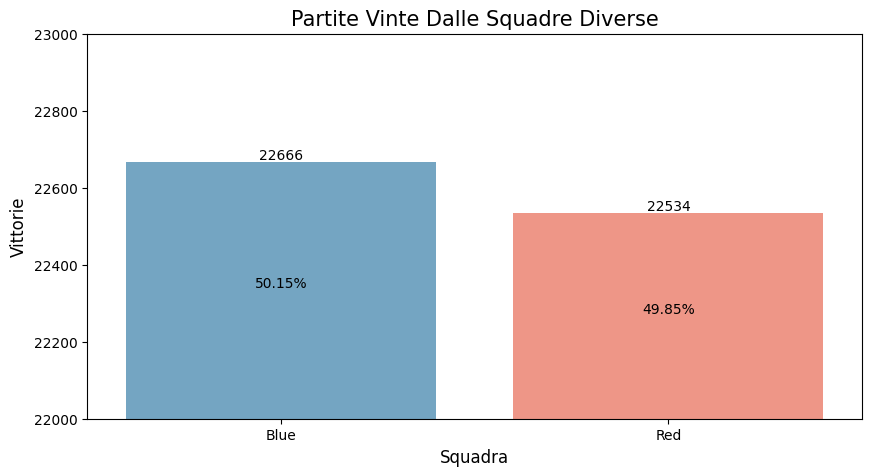

In [32]:
# Calculate win counts
win_counts = df['blueWin'].value_counts() # A series of how many times won blue (1.0), and red
blue_wins = win_counts.get(1.0)
red_wins = win_counts.get(0.0)
blueWinMatch = df['blueWin'].sum()
total_matches = len(df)
blueWinpercent = (blueWinMatch / total_matches) * 100
redWinMatch = total_matches - df['blueWin'].sum()
redWinpercent = (redWinMatch / total_matches) * 100
#print(redWinpercent)
#print(blueWinpercent)
# Create a DataFrame for visualization
# Need to add the point of difference between 2 bars
win_data = pd.DataFrame({
    'Team': ['Blue', 'Red'],
    'Wins': [blue_wins, red_wins]
})
#display(win_data)
plt.figure(figsize=(10,5))
barplot = sns.barplot(x='Team', y = 'Wins', data=win_data, hue="Team",palette={"Blue":"#67a9cf","Red":"#ff8a76"})
plt.ylim(22000,23000)
plt.title("Partite Vinte Dalle Squadre Diverse", fontsize=15)
plt.xlabel("Squadra",fontsize = 12)
plt.ylabel("Vittorie",fontsize = 12)
count = 0
# Loop over patches (bars) in plot
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        x = p.get_x() + p.get_width() / 2., 
        y = height + 0.5, 
        s = '{:1.0f}'.format(height), 
        ha="center", 
        va="bottom"
    )
    if count == 0:
        barplot.text(
                x = p.get_x() + p.get_width() / 2., 
                y = (height + 22000) /2, 
                s = '{:0.2f}'.format((blue_wins / total_matches) * 100) + "%", 
                ha="center",    
                va="bottom"
                )
        count+=1
    elif count == 1:
         barplot.text(
                x = p.get_x() + p.get_width() / 2., 
                y = (height + 22000) /2, 
                s = '{:0.2f}'.format((red_wins / total_matches) * 100) + "%", 
                ha="center",    
                va="bottom"
            ) 

## Rapporto Placche Torri
----
#### Quando la squadra blu distrugge più di <ins>6 placche</ins>, la squadra rossa inizia a <ins>distruggere più torri blu</ins>

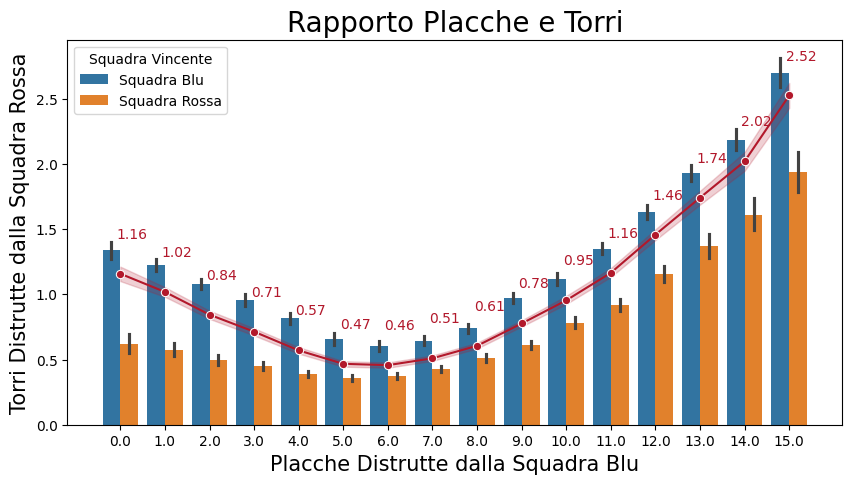

In [14]:
#sns.scatterplot(data=df, x="blueTeamTurretPlatesDestroyed", y = "redTeamTowersDestroyed")
#sns.boxenplot(data=df, x="blueTeamTurretPlatesDestroyed", y = "redTeamTowersDestroyed", hue="blueWin")
plt.figure(figsize=(10,5)) # Ensure that the values on x can be read
# On Y axis it did a gruopby blueteamturreplates, that's cause of the mid values and not integers
barp = sns.barplot(data=df, x="blueTeamTurretPlatesDestroyed", y = "redTeamTowersDestroyed", hue="blueWin")

#mean_values = df.groupby('blueTeamTurretPlatesDestroyed')['redTeamTowersDestroyed'].mean().reset_index()
#sns.lineplot(data=mean_values,x="blueTeamTurretPlatesDestroyed", y = "redTeamTowersDestroyed", color="black", marker="o")
# It lineplot auto did the mean values
meanline = sns.lineplot(data=df,x="blueTeamTurretPlatesDestroyed", y = "redTeamTowersDestroyed", color="#b2182b", marker="o")

# Modify the Legend from bluewin = 0.0 to BlueWin
plt.legend(title="Squadra Vincente")
legend = plt.gca().get_legend()
for text in legend.texts:
    if text.get_text() == '0.0':
        text.set_text('Squadra Blu')
    elif text.get_text() == '1.0':
        text.set_text('Squadra Rossa')

line = meanline.lines[32]
for x, y in zip(line.get_xdata(), line.get_ydata()):
    plt.text(x + 0.27, y + 0.25, f'{y:.2f}', color='#b2182b', ha='center', va='bottom')
    #plt.annotate(f'{y:.2f}',xy=(x,y),xytext=(x + 0.27,y + 0.27),xycoords='data',textcoords='data',
     #            arrowprops=dict(color='#b2182b',arrowstyle="-"))

# Adding semicol. to suppress the output of label 
plt.title("Rapporto Placche e Torri",fontsize=20);
plt.ylabel("Torri Distrutte dalla Squadra Rossa",fontsize=15);
plt.xlabel("Placche Distrutte dalla Squadra Blu",fontsize=15);

### Importanza del Primo Sangue

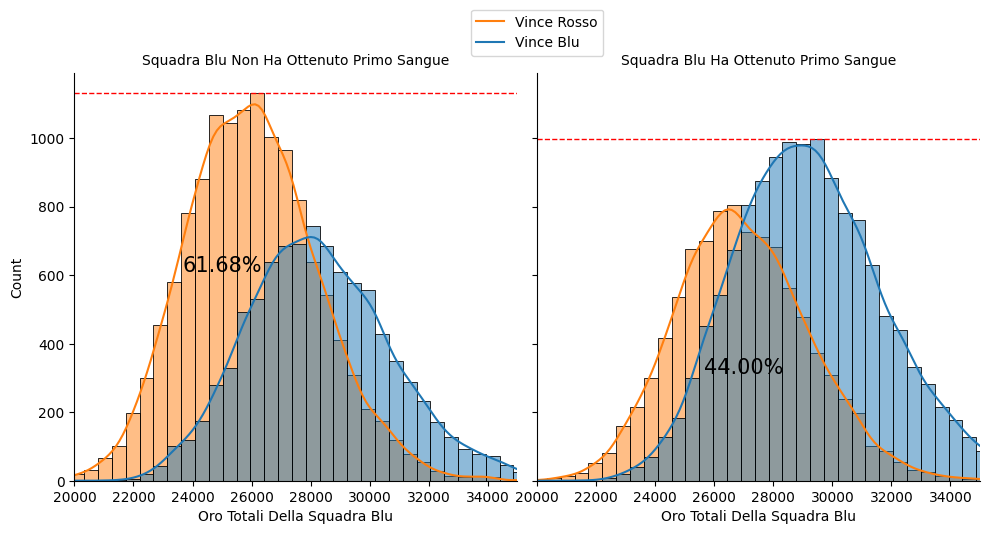

In [15]:
#plt.figure(figsize=(10,6))
total_gold = sns.displot(data=df, x="blueTeamTotalGold",col="blueTeamFirstBlood", kde=True,bins=50, hue="redWin",legend=False)   
plt.xlim(20000,35000)
#plt.title("Importanza Del Primo Sangue", fontsize=20)
# Set a new legend to change, the default cannot be changed
plt.legend(df['redWin'].unique(), loc='center',bbox_to_anchor=(0, 1.1))

legend = plt.gca().get_legend()
for text in legend.texts:
    if text.get_text() == '0.0':
        text.set_text('Vince Rosso')
    elif text.get_text() == '1.0':
        text.set_text('Vince Blu')

count = 0
new_titles = ['Squadra Blu Non Ha Ottenuto Primo Sangue', 'Squadra Blu Ha Ottenuto Primo Sangue']
# Iterate over each subplot and title, .flat to flatten the list of axes into 1D iterator
for ax, title in zip(total_gold.axes.flat, new_titles):
    ax.set_title(title,fontsize = 10)
    ax.set_xlabel("Oro Totali Della Squadra Blu")
    
    max_height = ax.patches[0].get_height()
    for patch in ax.patches:
        if patch.get_height() > max_height:
            max_height = patch.get_height()
    # Draw the line
    ax.axhline(y=max_height, color='r', linestyle='--', linewidth=1)
    # Calculate the area of each figure
    area = list()
    for line in ax.get_lines():
        x = line.get_xdata()
        y = line.get_ydata()
        area.append(trapezoid(y, x))
    # Insert the measure
    if count == 0:
            ax.text(
                    x = 25000, 
                    y = 600, 
                    s = '{:0.2f}'.format(int(area[0])/100000) + "%", 
                    ha="center",    
                    va="bottom",
                    fontsize = 15
                    )
            count+=1
    else:
            ax.text(
                    x = 27000, 
                    y = 300, 
                    s = '{:0.2f}'.format(int(area[0])/100000) + "%", 
                    ha="center",    
                    va="bottom",
                    fontsize = 15
                    )
plt.show()

#### La squadra blu ottine circa <ins>3000 gold</ins> in più se ottine il primo sangue, di conseguenza aumenta anche la probabilità di vittoria

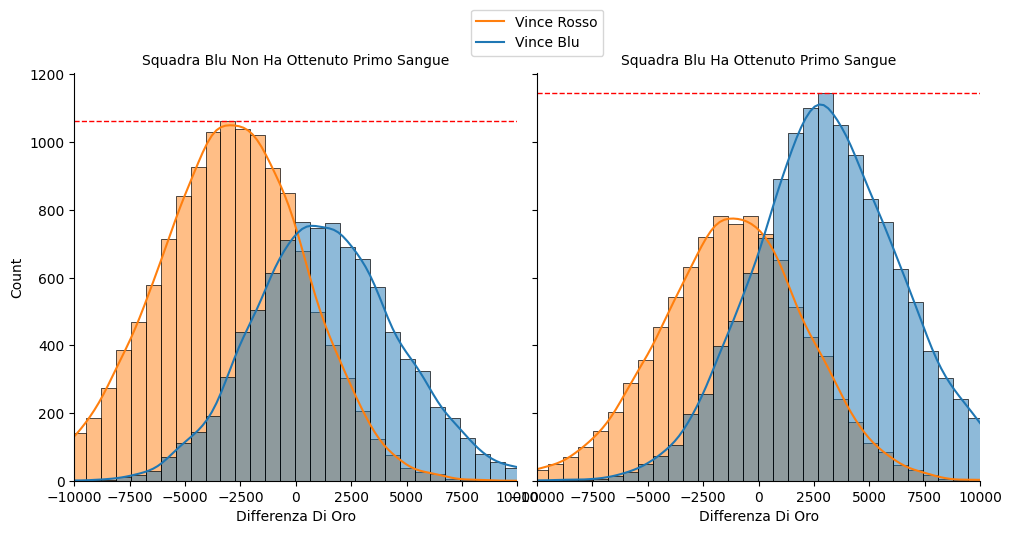

In [16]:
gold_diff = sns.displot(data=df, x="totalGoldDiff",col="blueTeamFirstBlood", kde=True, bins=60,hue="redWin",legend=False)
plt.xlim(-10000,10000)
plt.legend(df['redWin'].unique(), loc='center',bbox_to_anchor=(0, 1.1))
legend = plt.gca().get_legend()
for text in legend.texts:
    if text.get_text() == '0.0':
        text.set_text('Vince Rosso')
    elif text.get_text() == '1.0':
        text.set_text('Vince Blu')
new_titles = ['Squadra Blu Non Ha Ottenuto Primo Sangue', 'Squadra Blu Ha Ottenuto Primo Sangue']
for ax, title in zip(gold_diff.axes.flat, new_titles):
    ax.set_title(title,fontsize = 10)
    ax.set_xlabel("Differenza Di Oro")
    
    max_height = ax.patches[0].get_height()
    for patch in ax.patches:
        if patch.get_height() > max_height:
            max_height = patch.get_height()
    # Draw the line
    ax.axhline(y=max_height, color='r', linestyle='--', linewidth=1)
    

#### La differenza di Oro è di <ins>600</ins> per la squadra che ottiene il primo sangue

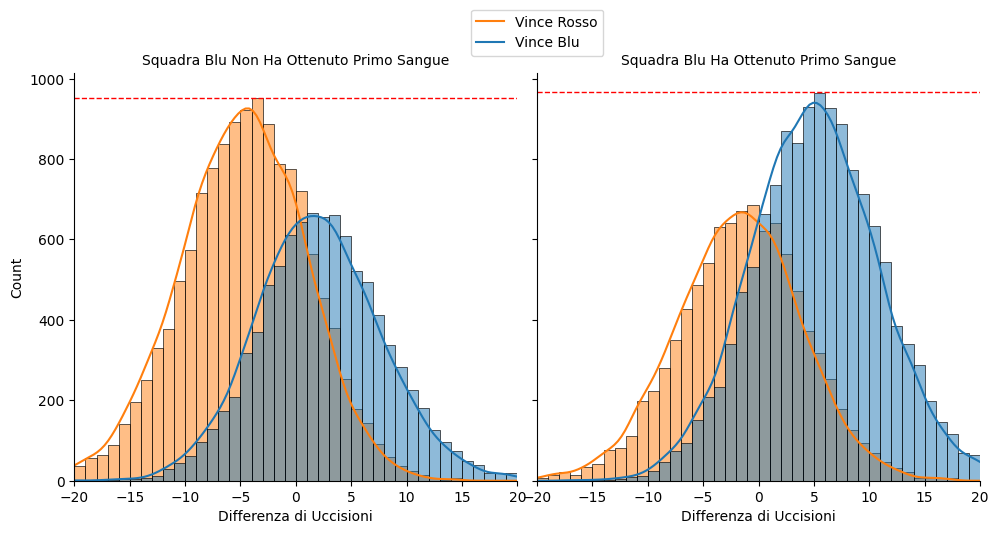

In [17]:
kill_diff = sns.displot(data=df, x="totalKillsDiff",col="blueTeamFirstBlood", kde=True, bins=65,hue="redWin", legend=False)
plt.xlim(-20,20)
plt.legend(df['redWin'].unique(), loc='center',bbox_to_anchor=(0, 1.1))
legend = plt.gca().get_legend()
for text in legend.texts:
    if text.get_text() == '0.0':
        text.set_text('Vince Rosso')
    elif text.get_text() == '1.0':
        text.set_text('Vince Blu')

new_titles = ['Squadra Blu Non Ha Ottenuto Primo Sangue', 'Squadra Blu Ha Ottenuto Primo Sangue']
count = 0
for ax, title in zip(kill_diff.axes.flat, new_titles):
    ax.set_title(title,fontsize = 10)
    ax.set_xlabel("Differenza di Uccisioni")
    if count == 0:
        ax.axhline(y=953,color='r', linestyle='--', linewidth=1)
        count+=1
    else:
        ax.axhline(y=966,color='r', linestyle='--', linewidth=1)

#### Differiscono di <ins>3 uccisioni</ins> nei casi dell'ottenimento del primo sangue 

In [18]:
#sns.scatterplot(x="redTeamMinionsKilled" ,y= "blueTeamTotalDamageToChamps", data=df, hue="blueWin")

In [19]:
#sns.pairplot(data=df, vars=('redTeamMinionsKilled', 'blueTeamTotalDamageToChamps', 'redTeamJungleMinions', 'redTeamXp'),hue = 'blueWin')
#plt.show()

In [20]:
#plt.plot(df['blueTeamXp'], df['blueTeamTotalKills'], "r--", lw=3)
#plt.show() 

#sns.stripplot(y = "redTeamWardsPlaced", x = "redTeamDragonKills", data=df, palette="YlGnBu",dodge=True)

In [21]:
#sns.scatterplot(data = df, x='blueTeamTotalGold', y='blueTeamTowersDestroyed', hue='blueWin', size='totalGoldDiff', alpha=0.7)
#plt.show()

In [22]:
#sns.pairplot(data=df, vars=('blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalDamageToChamps', 'blueTeamTotalKills'),hue = 'blueWin')
#plt.show()

In [23]:
#sns.pairplot(data=df, vars=('blueWin', 'blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalKills', 'blueTeamDragonKills'), hue='blueWin')
#plt.show()

In [24]:
#sns.relplot(data = df, y = "blueTeamTotalGold", x = "blueTeamTowersDestroyed", col="blueWin")
#sns.relplot(data = df, y = "redTeamTotalGold", x = "redTeamTowersDestroyed", col="blueWin")
#plt.figure(figsize=(10,6))
#sns.boxplot(x='blueTeamTotalGold', y='blueTeamTowersDestroyed', data=df, palette='coolwarm')
#plt.show()

In [34]:
# Use reset_index to ensure that blue_Dragons is not used as index, adding a col of index reserving blue_Dragons as usable data
win_rates = lol_15_na_df.groupby('blue_Dragons')['blue_Win'].mean().reset_index()
#display(win_rates)
win_rates['Win_Rate'] = win_rates['blue_Win'] * 100
win_rates = win_rates.drop('blue_Win',axis=1)
win_rates = win_rates.rename(columns={'blue_Dragons':'Dragons'})
#display(win_rates)
win_rates2 = lol_15_na_df.groupby('red_Dragons')['red_Win'].mean().reset_index()
win_rates2['Win_Rate'] = win_rates2['red_Win'] * 100
win_rates2 = win_rates2.drop('red_Win',axis=1)
win_rates2 = win_rates2.rename(columns={'red_Dragons':'Dragons'})
#display(win_rates2)
#winR = pd.merge(win_rates, win_rates2, on="Dragons")
winR2 = pd.concat((win_rates2,win_rates))
winR2['side'] = ['red', 'red', 'red', 'blue', 'blue', 'blue']
#display(winR)
#display(winR2)

### Quanto è importante ottenere i potenziamenti dei monstri neutri
---
#### A parità della quantità dei draghi la squadra rossa ha meno percentuale di vittoria 
#### La squadra rossa è di <ins>3.8%</ins> sotto della squadra blu, ogni drago aumenta di <ins>20%</ins> la percentuale di vittoria

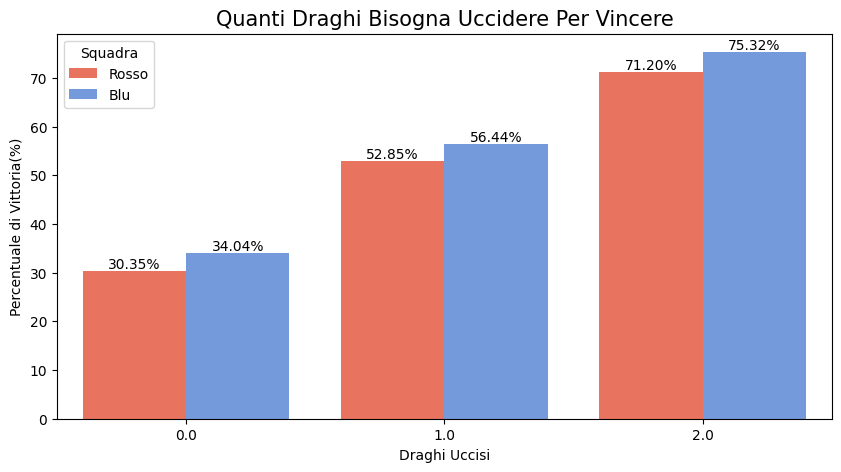

In [26]:
plt.figure(figsize=(10,5))
barcolor = ['tomato' if (x == "red") else ('blue') for x in winR2.side]
drakeplot = sns.barplot(data=winR2, x="Dragons", y="Win_Rate", hue="side", palette={"blue":"cornflowerblue", "red":"tomato"})
plt.legend(title="Squadra")
legend = plt.gca().get_legend()
for text in legend.texts:
    if text.get_text() == "red":
        text.set_text('Rosso')
    elif text.get_text() == "blue":
        text.set_text('Blu')
for p in drakeplot.patches:
    height = p.get_height()
    # 0 out of nowhere
    if height == 0:
        continue
    else:
        drakeplot.text(
            x = p.get_x() + p.get_width() / 2., 
            y = height, 
            s = '{:.02f}'.format(height) + "%", 
            ha="center", 
            va="bottom"
        )
plt.title("Quanti Draghi Bisogna Uccidere Per Vincere",fontsize=15);
plt.xlabel("Draghi Uccisi");
plt.ylabel("Percentuale di Vittoria(%)");

In [27]:
win_rates_cloud = lol_15_na_df.groupby('blue_Cloud_Drake')['blue_Win'].mean().reset_index()
win_rates_cloud['Win_Rate'] = win_rates_cloud['blue_Win'] * 100
win_rates_cloud = win_rates_cloud.drop('blue_Win',axis=1)
win_rates_cloud = win_rates_cloud.rename(columns={'blue_Cloud_Drake':'Dragons'})
#display(win_rates_cloud)
win_rates_infernal = lol_15_na_df.groupby('blue_Infernal_Drake')['blue_Win'].mean().reset_index()
win_rates_infernal['Win_Rate'] = win_rates_infernal['blue_Win'] * 100
win_rates_infernal = win_rates_infernal.drop('blue_Win',axis=1)
win_rates_infernal = win_rates_infernal.rename(columns={'blue_Infernal_Drake':'Dragons'})
#display(win_rates_infernal)
win_rates_mountain = lol_15_na_df.groupby('blue_Mountain_Drake')['blue_Win'].mean().reset_index()
win_rates_mountain['Win_Rate'] = win_rates_mountain['blue_Win'] * 100
win_rates_mountain = win_rates_mountain.drop('blue_Win',axis=1)
win_rates_mountain = win_rates_mountain.rename(columns={'blue_Mountain_Drake':'Dragons'})
#display(win_rates_mountain)
win_rates_ocean = lol_15_na_df.groupby('blue_Ocean_Drake')['blue_Win'].mean().reset_index()
win_rates_ocean['Win_Rate'] = win_rates_ocean['blue_Win'] * 100
win_rates_ocean = win_rates_ocean.drop('blue_Win',axis=1)
win_rates_ocean = win_rates_ocean.rename(columns={'blue_Ocean_Drake':'Dragons'})
#display(win_rates_ocean)
win_rates_chemtech = lol_15_na_df.groupby('blue_Chemtech_Drake')['blue_Win'].mean().reset_index()
win_rates_chemtech['Win_Rate'] = win_rates_chemtech['blue_Win'] * 100
win_rates_chemtech = win_rates_chemtech.drop('blue_Win',axis=1)
win_rates_chemtech = win_rates_chemtech.rename(columns={'blue_Chemtech_Drake':'Dragons'})
#display(win_rates_chemtech)
win_rates_hextech = lol_15_na_df.groupby('blue_Hextech_Drake')['blue_Win'].mean().reset_index()
win_rates_hextech['Win_Rate'] = win_rates_hextech['blue_Win'] * 100
win_rates_hextech = win_rates_hextech.drop('blue_Win',axis=1)
win_rates_hextech = win_rates_hextech.rename(columns={'blue_Hextech_Drake':'Dragons'})
#display(win_rates_hextech)
win_rates_grubs = lol_15_na_df.groupby('blue_Void_Grubs')['blue_Win'].mean().reset_index()
win_rates_grubs['Win_Rate'] = win_rates_grubs['blue_Win'] * 100
win_rates_grubs = win_rates_grubs.drop('blue_Win',axis=1)
#win_rates_grubs = win_rates_grubs.rename(columns={'blue_Void_Grubs':'Dragons'})
win_rates_grubs = pd.DataFrame(win_rates_grubs)
#display(win_rates_grubs)
win_rates_drake = pd.concat((win_rates_cloud,win_rates_infernal))
win_rates_drake = pd.concat([win_rates_drake,win_rates_mountain], axis=0)
win_rates_drake = pd.concat([win_rates_drake,win_rates_ocean], axis=0)
win_rates_drake = pd.concat([win_rates_drake,win_rates_chemtech], axis=0)
win_rates_drake = pd.concat([win_rates_drake,win_rates_hextech], axis=0)
win_rates_drake['type'] = ['Cloud','Cloud','Infernal','Infernal','Mountain','Mountain','Ocean','Ocean','Chemtech','Chemtech','Hextech','Hextech']
win_rates_drake_with_grubs = pd.concat([win_rates_drake,win_rates_grubs],axis=0)
win_rates_drake_with_grubs['type'] = ['Cloud','Cloud','Infernal','Infernal','Mountain','Mountain','Ocean','Ocean','Chemtech','Chemtech','Hextech','Hextech','Grubs','Grubs','Grubs','Grubs','Grubs','Grubs','Grubs']
win_rates_drake_with_grubs.loc[win_rates_drake_with_grubs['type'] == 'Grubs', 'Dragons'] = range(7)
win_rates_drake_with_grubs = win_rates_drake_with_grubs.drop('blue_Void_Grubs',axis=1)
#display(win_rates_drake_with_grubs)
win_rates_drake = pd.DataFrame(win_rates_drake)

### Quale tipologia di drago porta la vittoria alla squadra nei primi 15 minuti

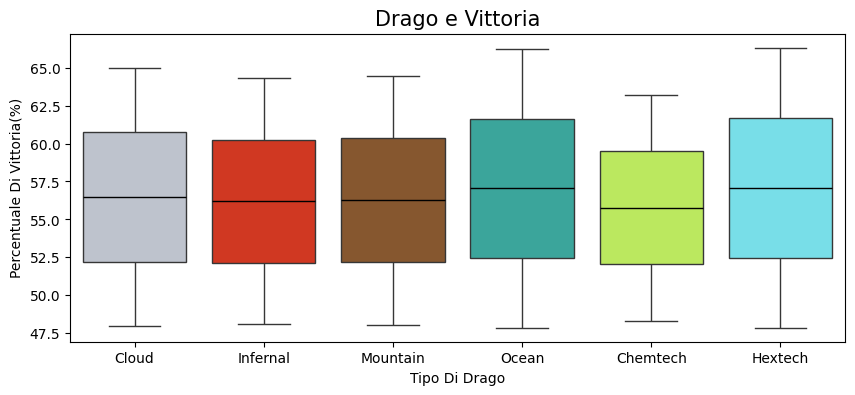

In [28]:
plt.figure(figsize=(10,4))
drake_colors = ["#bbc2d0","#ed2305","#945620","#29b7a9","#c3ff48","#65eefb"]
sns.boxplot(
    data=win_rates_drake,
    x='type', y='Win_Rate',
    medianprops={"color": "k", "linewidth": 1},
    hue="type",palette=drake_colors)
plt.title("Drago e Vittoria", fontsize=15)
plt.xlabel("Tipo Di Drago")
plt.ylabel("Percentuale Di Vittoria(%)")
plt.show()

#### I draghi <ins>Hextech e Ocean</ins> presentano una percentuale di vittoria più alta rispetto ad altri draghi, ambe due <ins>66.3%</ins> di vittoria; mentre il drago <ins>Chemtech la più bassa con 63.2%</ins>

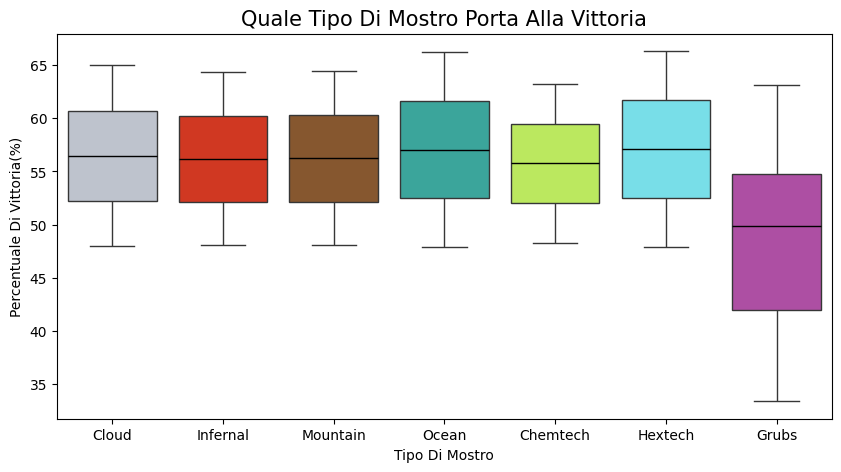

In [29]:
plt.figure(figsize=(10,5))
Monster_colors = ["#bbc2d0","#ed2305","#945620","#29b7a9","#c3ff48","#65eefb","#bd3faf"]
sns.boxplot(
    data=win_rates_drake_with_grubs,
    x='type', y='Win_Rate',
    medianprops={"color": "k", "linewidth": 1},
    hue="type",palette=Monster_colors)
plt.title("Quale Tipo Di Mostro Porta Alla Vittoria", fontsize=15)
plt.xlabel("Tipo Di Mostro")
plt.ylabel("Percentuale Di Vittoria(%)")
plt.show()

#### Se aggiungiamo anche i grubs nella lista si nota che uccidendo 1 grub si avrà <ins>solo 33.3%</ins> di vittoria, se vengono uccisi <ins>6 grubs si avrà 63.1%</ins> di vittoria, quasi la stessa percentuale di vittoria uccidendo un drago Chemtech

### Conclusioni
----
+ #### I fattori che influenzano la vittoria sono: **oro, uccisioni e esperienza campione**(per salire di livello)
+ #### Ogni uccisione effettuato aumenta la percentuale di vittoria di circa **15%**, se la differenza di uccisioni è **superiore ad 9** la vittoria nei primi 15 minuti è poca
+ #### La percentuale di vittoria della squadra **blu è di 50.15% e la rossa 49.85%**, differiscono solo di **0.30%**, rispetto agli anni precedenti è più bilanciata la vittoria tra le due squadre
+ #### Se distruggi più di **6 placche**, rischi che la squadra avversia inizii a distruggere più torri, diminuendo la percentuale di vittoria
+ #### Il **primo sangue** è un fattore importante per vincere la partita, dato che influenza l'oro e le uccisioni della squadra, che sono i fattori più importanti per la partita
+ #### A parità di draghi la **squadra rossa perde più facilmente** rispetto alla squadra blu, l'uccisione del drago influenza pesantemente la partita
+ #### La squadra che ha ottenuto i poteri del drago **Hextech e Ocean** hanno **più probabilità di vincere**
+ #### **I draghi hanno priorità maggiore dei grubs**, che se uccisi tutti 6 equivale ad uccidere un drago Chemtech